In [244]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
languages = ["arabic","chinese","english","french","russian","spanish"]
metrics = ["editors","absolute-bytes","edited-page","edits","netbytediff","newpages"]

user_dataset = []
anon_dataset = []
for lan in languages:
    user_lan_dataset = []
    anon_lan_dataset = []
    for met in metrics:
        file_name = lan+"-"+met+".csv"

        data = pd.read_csv("./data/"+file_name)
        user_data = data["total.user"].to_list()
        anon_data = data["total.anonymous"].to_list()
        user_lan_dataset.append(user_data)
        anon_lan_dataset.append(anon_data)
    user_dataset.append(user_lan_dataset)
    anon_dataset.append(anon_lan_dataset)

In [246]:
def regression(metric, x, y, axs, i, j, user):
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'black']
    
    user_editors_normalized = (x - np.min(x)) / np.ptp(x)
    metric_user_values_normalized = (y - np.min(y)) / np.ptp(y)

    # Linear regression
    coefficients = np.polyfit(user_editors_normalized, metric_user_values_normalized, 1)
    m = coefficients[0] 
    b = coefficients[1] 
    predicted_y = m * user_editors_normalized + b
    residuals = np.abs(predicted_y - metric_user_values_normalized)
    print("first: " + str(np.sum(residuals)))
    rmse1 = np.sqrt(np.mean(residuals**2))

    # Quardratic regression 
    coefficients2 = np.polyfit(user_editors_normalized, metric_user_values_normalized, 2)
    a2 = coefficients2[0] 
    b2 = coefficients2[1] 
    c2 = coefficients2[2] 
    predicted_y = a2 * user_editors_normalized ** 2 + b2 * user_editors_normalized + c2
    residuals2 = np.abs(predicted_y - metric_user_values_normalized)
    print("second: " + str(np.sum(residuals2)))
    rmse2 = np.sqrt(np.mean(residuals2**2))

    # 3rd degree 
    coefficients3 = np.polyfit(user_editors_normalized, metric_user_values_normalized, 3)
    a3 = coefficients3[0] 
    b3 = coefficients3[1] 
    c3 = coefficients3[2] 
    d3 = coefficients3[3] 
    predicted_y = a3 * user_editors_normalized ** 3 + b3 * user_editors_normalized ** 2 + c3 * user_editors_normalized + d3
    residuals3 = np.abs(predicted_y - metric_user_values_normalized)
    print("third: " + str(np.sum(residuals3)))
    rmse3 = np.sqrt(np.mean(residuals3**2))

    # 4th degree 
    coefficients4 = np.polyfit(user_editors_normalized, metric_user_values_normalized, 4)
    a4 = coefficients4[0] 
    b4 = coefficients4[1] 
    c4 = coefficients4[2] 
    d4 = coefficients4[3] 
    e4 = coefficients4[4] 
    predicted_y = a4 * user_editors_normalized ** 4 + b4 * user_editors_normalized ** 3 + c4 * user_editors_normalized ** 2 + d4 * user_editors_normalized + e4
    residuals4 = np.abs(predicted_y - metric_user_values_normalized)
    print("four: " + str(np.sum(residuals4)))
    rmse4 = np.sqrt(np.mean(residuals4**2))

    # 5th degree 
    coefficients5 = np.polyfit(user_editors_normalized, metric_user_values_normalized, 5)
    a5 = coefficients5[0] 
    b5 = coefficients5[1] 
    c5 = coefficients5[2] 
    d5 = coefficients5[3] 
    e5 = coefficients5[4] 
    f5 = coefficients5[5] 
    predicted_y = a5 * user_editors_normalized ** 5 + b5 * user_editors_normalized ** 4 + c5 * user_editors_normalized ** 3 + d5 * user_editors_normalized ** 2 + e5 * user_editors_normalized + f5
    residuals5 = np.abs(predicted_y - metric_user_values_normalized)
    print("five: " + str(np.sum(residuals5)))
    rmse5 = np.sqrt(np.mean(residuals5**2))

    x_values = np.linspace(min(user_editors_normalized), max(user_editors_normalized), 58)
    # if (rmse1 == min(rmse1, rmse2, rmse3)):
    if (np.sum(residuals) == min(np.sum(residuals), np.sum(residuals2), np.sum(residuals3), np.sum(residuals4), np.sum(residuals5))):
        # print(rmse1)
        y_values = np.polyval(coefficients, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + "-deg1")
    # elif (rmse2 == min(rmse1, rmse2, rmse3)):
    elif (np.sum(residuals2) == min(np.sum(residuals), np.sum(residuals2), np.sum(residuals3), np.sum(residuals4), np.sum(residuals5))):
        # print(rmse2)
        y_values = np.polyval(coefficients2, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + "-deg2")
    elif (np.sum(residuals4) == min(np.sum(residuals), np.sum(residuals2), np.sum(residuals3), np.sum(residuals4), np.sum(residuals5))):
        # print(rmse4)
        y_values = np.polyval(coefficients4, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + "-deg4")
    elif (np.sum(residuals5) == min(np.sum(residuals), np.sum(residuals2), np.sum(residuals3), np.sum(residuals4), np.sum(residuals5))):
        # print(rmse5)
        y_values = np.polyval(coefficients5, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + "-deg5")
    else:
        # print(rmse3)
        y_values = np.polyval(coefficients3, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + "-deg3")

    axs[j-1].legend()
    axs[j-1].set_title(" " + metric + " for " + user, fontweight='bold')
    axs[j-1].set_xlabel("normalized " + user + " editors")
    axs[j-1].set_ylabel(metric)
        

first: 6.315031451594665
second: 6.3127123780404135
third: 6.339225853503615
four: 6.24935423350127
five: 6.254420142634596
first: 8.164176342181552
second: 7.85550395817802
third: 7.666542640622399
four: 7.324395005442083
five: 7.325235887324953
first: 6.7328135144928725
second: 6.662611972435308
third: 6.641411648585353
four: 6.7025478051604175
five: 6.710965022836106
first: 3.443176557769407
second: 3.4282323934305623
third: 3.328061215921095
four: 3.257533468630064
five: 3.1217427761324417
first: 9.965481038197536
second: 9.866462563127655
third: 9.866152902028702
four: 9.858433049818927
five: 9.8688884160779
first: 3.4911896045652155
second: 3.2399684422925974
third: 3.08526767870544
four: 3.0855148715383556
five: 3.073113047049315
first: 5.3306824261585195
second: 5.332769771332018
third: 5.367993515007317
four: 5.367189572126295
five: 5.389157686334011
first: 8.773427814478545
second: 8.28411397491686
third: 8.013894196843543
four: 7.727947942057204
five: 7.728514652485032
first

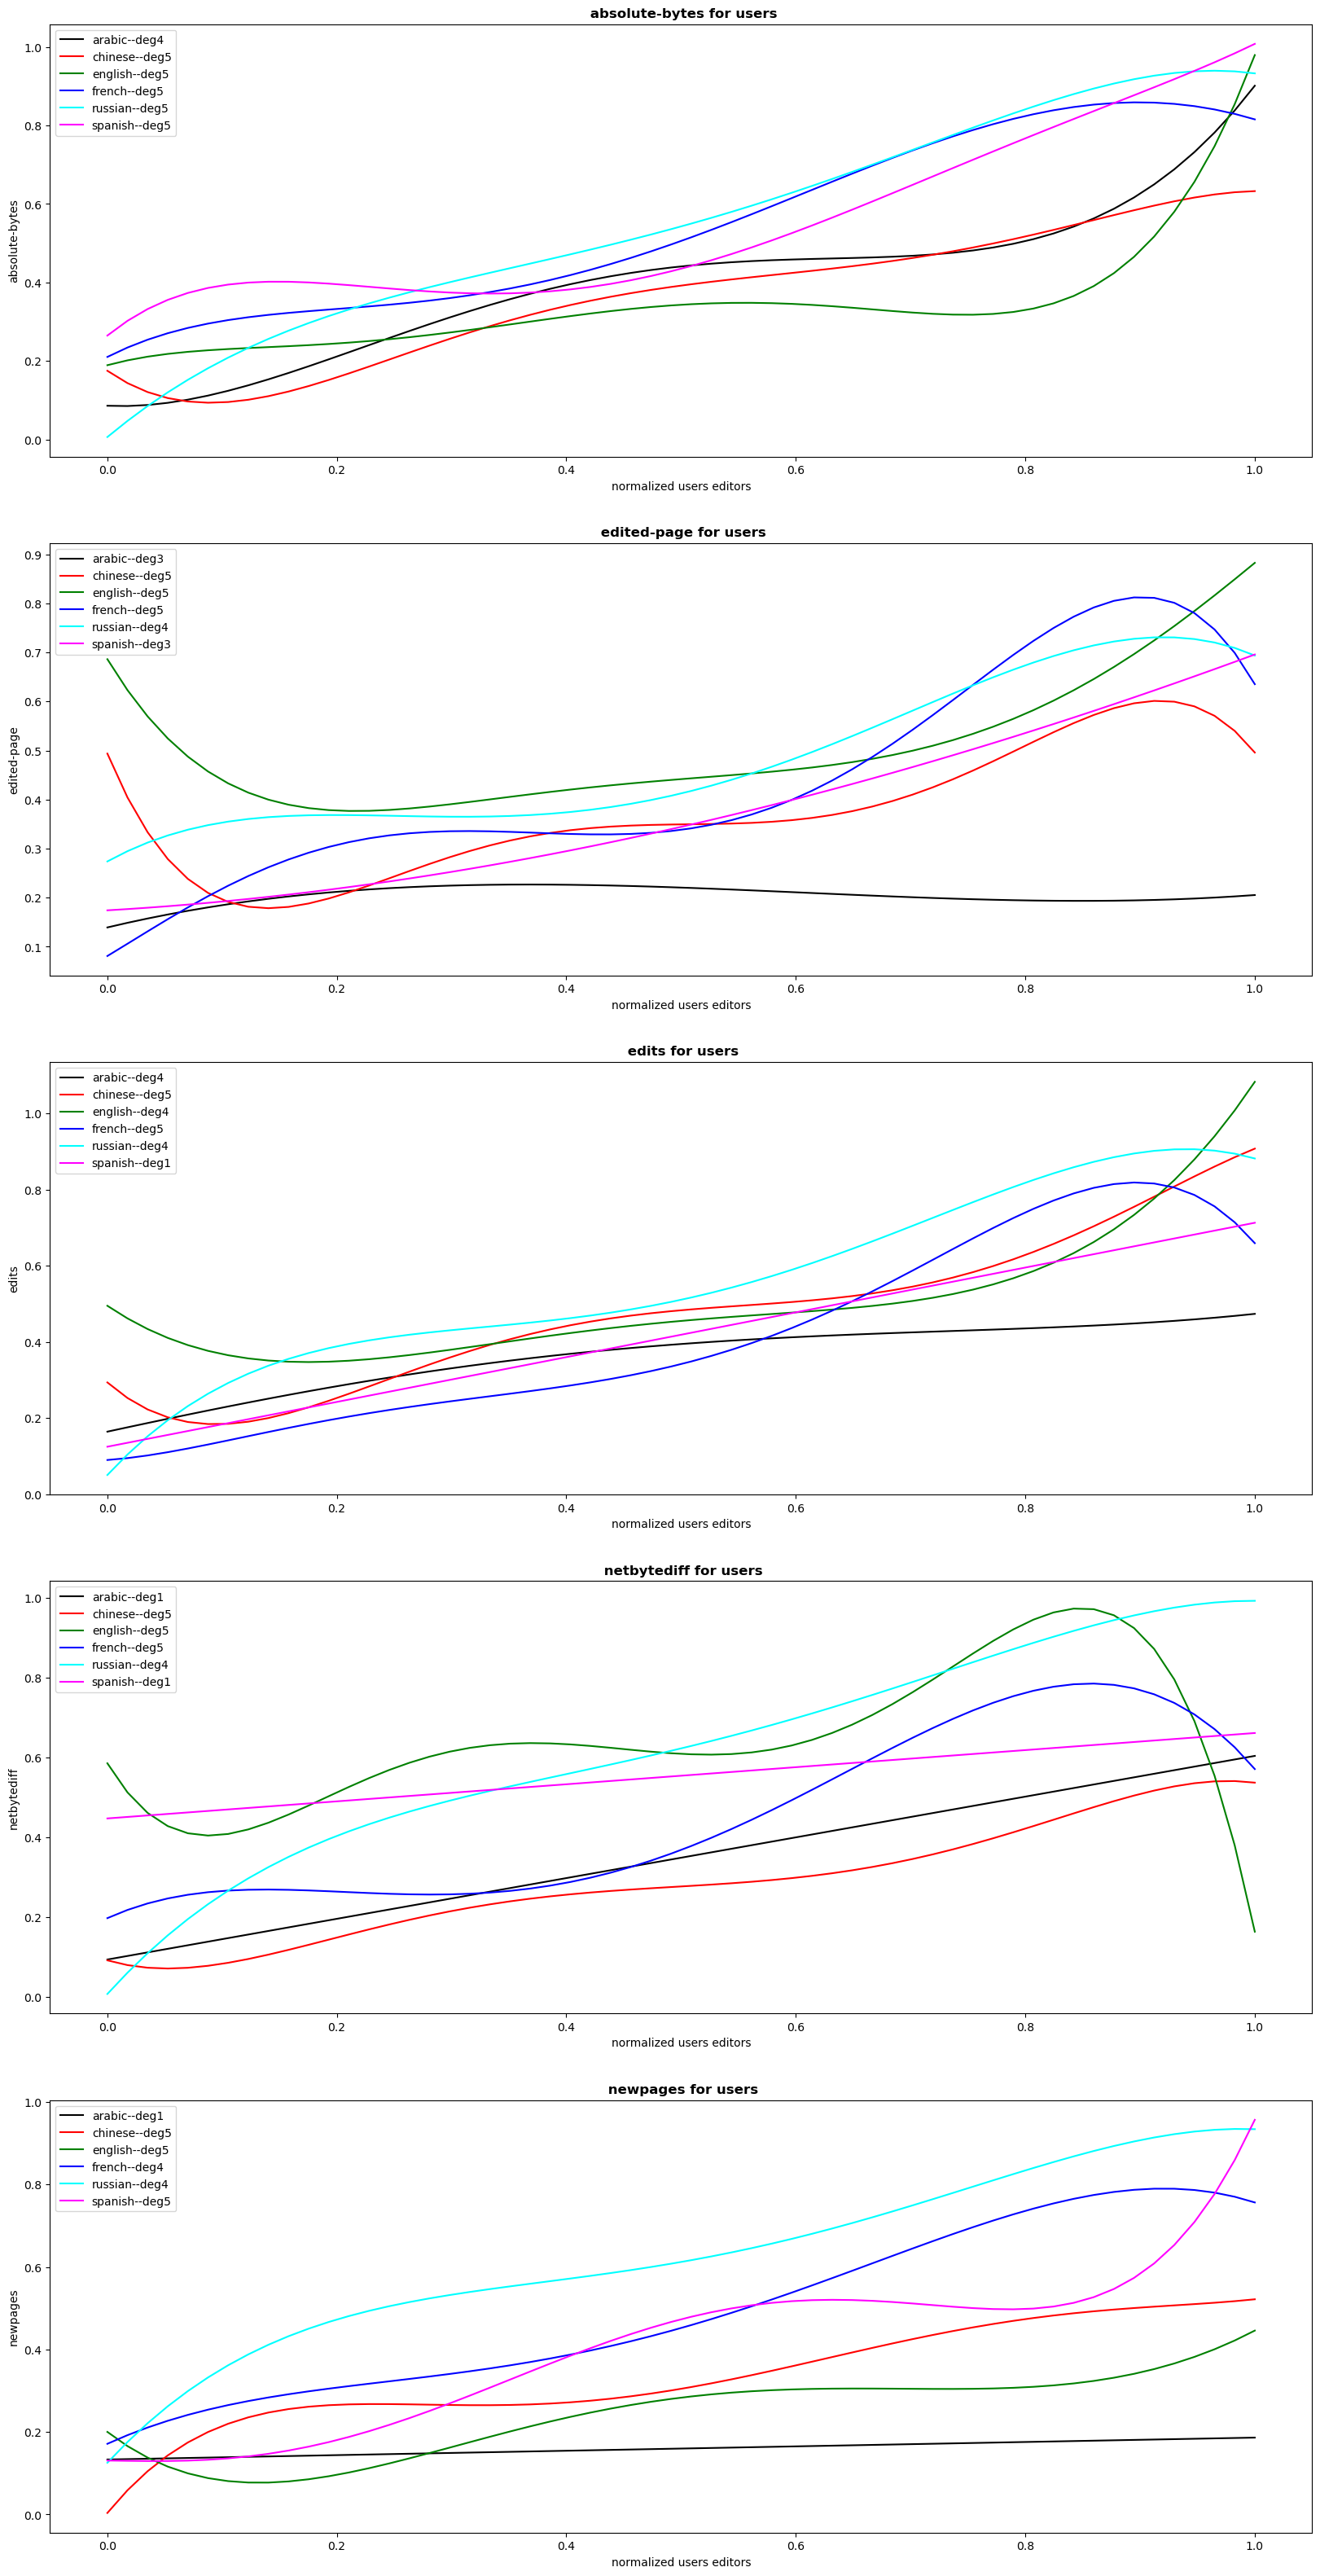

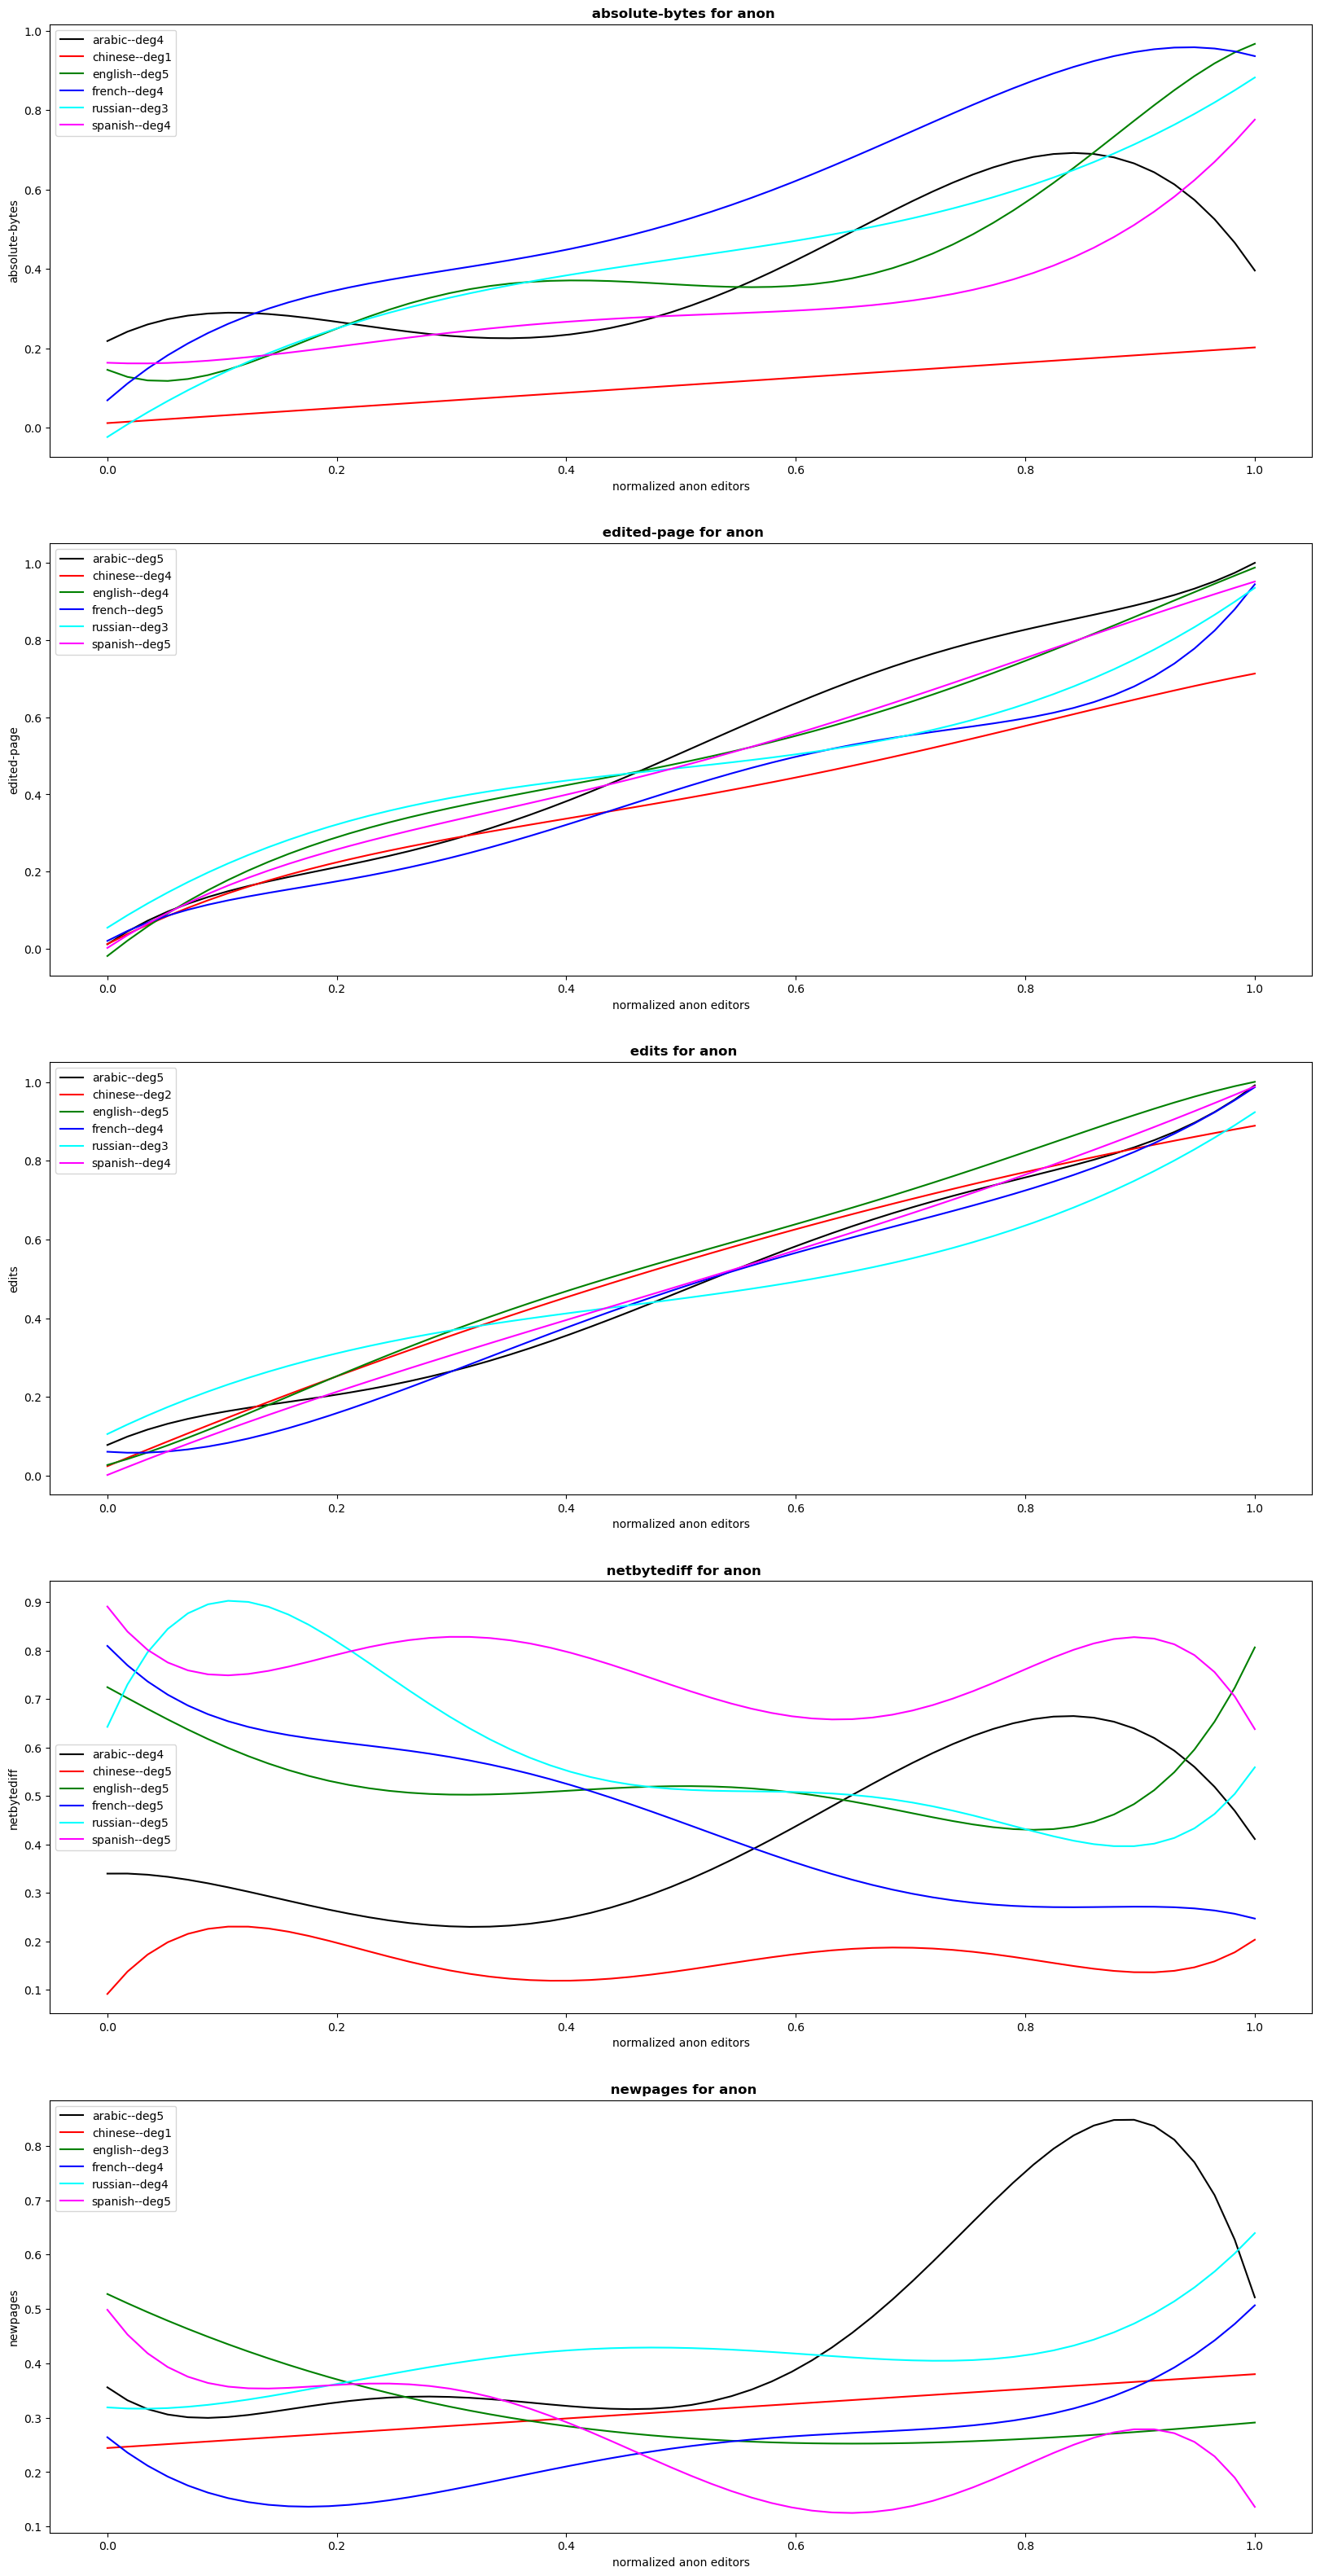

In [247]:
fig, axs = plt.subplots(5, 1, figsize=(20, 40))
fig1, axs1 = plt.subplots(5, 1, figsize=(20, 40))

for i in range(len(user_dataset)):
    lan = languages[i]
    user_lan_dataset = user_dataset[i]
    anon_lan_dataset = anon_dataset[i]
    
    # number of editors
    user_editors = user_lan_dataset[0]
    anon_editors = anon_lan_dataset[0]
    pcc_user = []
    pp_user = []
    pcc_anon = []
    pp_anon = []

    for j in range(1, len(user_dataset)):
        metric = metrics[j]
        metric_user_values = user_lan_dataset[j]
        metric_anon_values = anon_lan_dataset[j]

        # plt.scatter(user_editors, metric_user_values, color='blue', marker='o')
        regression(metric, user_editors, metric_user_values, axs, i, j, "users")

        regression(metric, anon_editors, metric_anon_values, axs1, i, j, "anon")

        correlation_user, p_value_user = pearsonr(user_editors, metric_user_values)
        pcc_user.append(correlation_user)
        pp_user.append(p_value_user)

        correlation_anon, p_value_anon = pearsonr(anon_editors, metric_anon_values)
        pcc_anon.append(correlation_anon)
        pp_anon.append(p_value_anon)

fig.savefig('graphs/regression-user.png', bbox_inches='tight', pad_inches=0.1)
fig1.savefig('graphs/regression-anon.png', bbox_inches='tight', pad_inches=0.1)

    # csv_file = 'stats/pearson-cc-user.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pcc_user)

    # csv_file = 'stats/pearson-p-user.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pp_user)

    # csv_file = 'stats/pearson-cc-anon.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pcc_anon)

    # csv_file = 'stats/pearson-p-anon.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pp_anon)

In [248]:
def plot(file_name, title, color = "viridis"):
    data = pd.read_csv("stats/" + file_name + ".csv", header = None)

    sns.heatmap(data, 
                xticklabels=metrics[1:], 
                yticklabels=languages, 
                cmap=color, 
                vmax=1,
                vmin=-1,
                annot=True, 
                fmt=".2f")

    plt.title(title, fontweight='bold')
    plt.xticks(rotation=15)
    plt.savefig('graphs/'+file_name, bbox_inches='tight', pad_inches=0.1)
    plt.show()

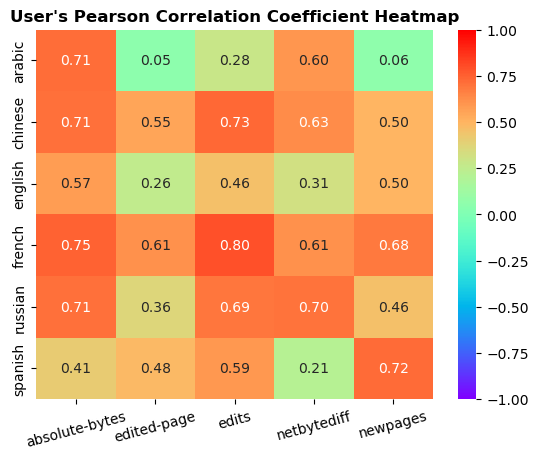

In [249]:
title = "User's Pearson Correlation Coefficient Heatmap"
plot("pearson-cc-user", title, "rainbow")

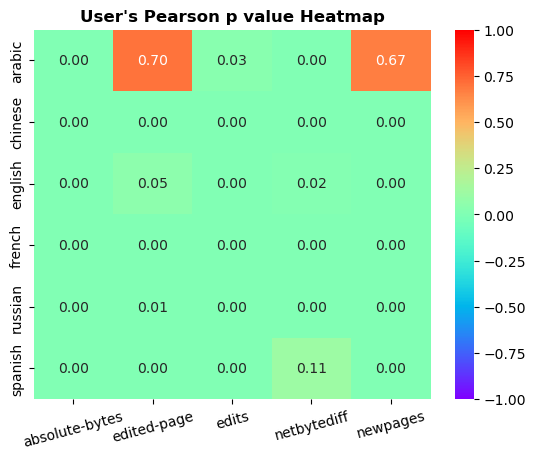

In [250]:
title = "User's Pearson p value Heatmap"
plot("pearson-p-user",title, "rainbow")

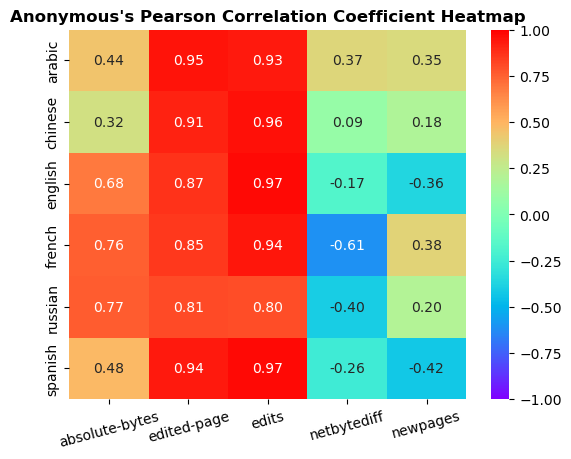

In [251]:
title = "Anonymous's Pearson Correlation Coefficient Heatmap"
plot("pearson-cc-anon", title, "rainbow")

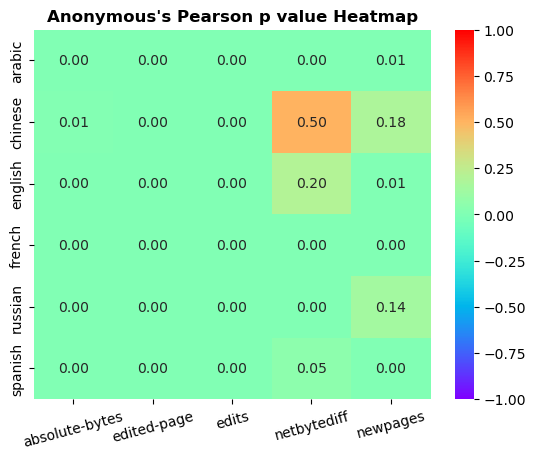

In [252]:
title = "Anonymous's Pearson p value Heatmap"
plot("pearson-p-anon", title, "rainbow")

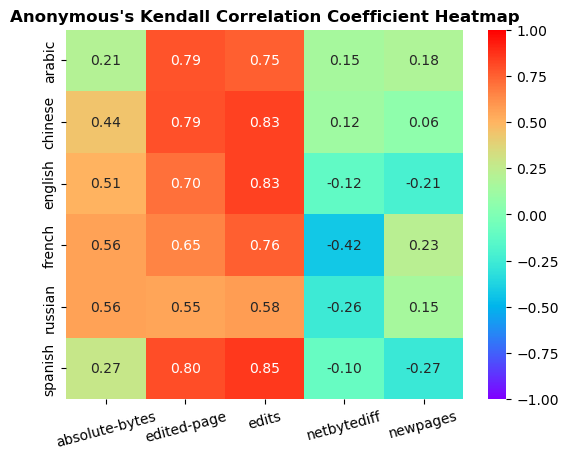

In [253]:
title = "Anonymous's Kendall Correlation Coefficient Heatmap"
plot("kendall-cc-anon", title,"rainbow")

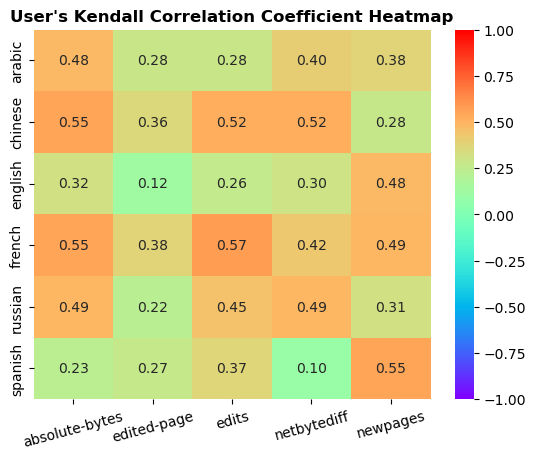

In [254]:
title = "User's Kendall Correlation Coefficient Heatmap"
plot("kendall-cc-user", title,"rainbow")

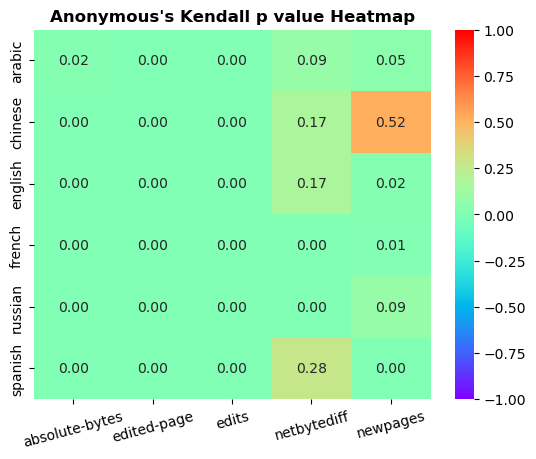

In [255]:
title = "Anonymous's Kendall p value Heatmap"
plot("kendall-p-anon", title, "rainbow")

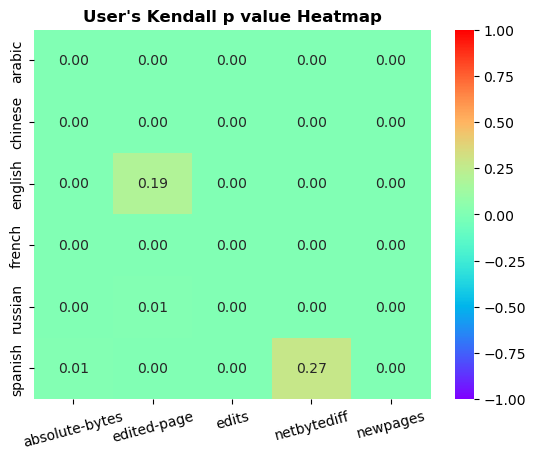

In [256]:
title = "User's Kendall p value Heatmap"
plot("kendall-p-user", title, "rainbow")

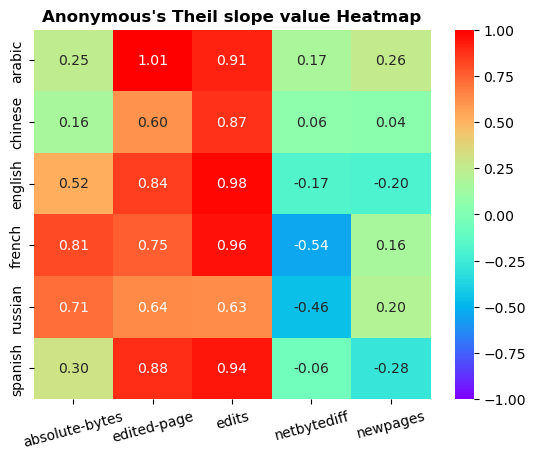

In [257]:
title = "Anonymous's Theil slope value Heatmap"
plot("theil-slope-anon", title, "rainbow")

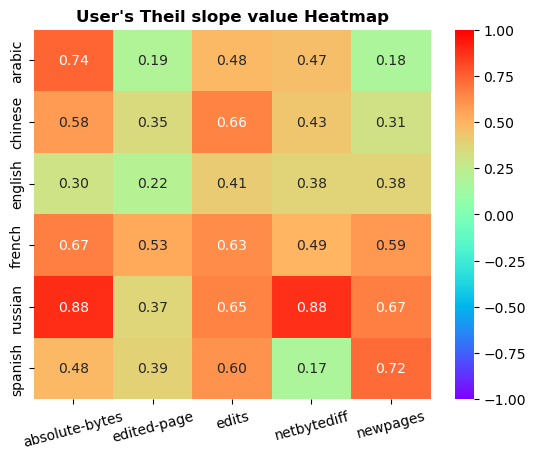

In [258]:
title = "User's Theil slope value Heatmap"
plot("theil-slope-user", title, "rainbow")

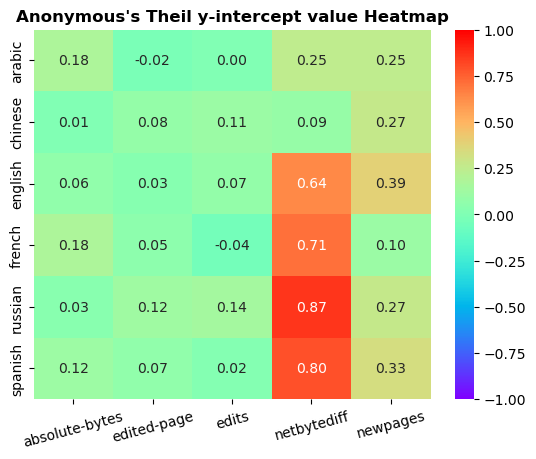

In [259]:
title = "Anonymous's Theil y-intercept value Heatmap"
plot("theil-intercept-anon", title, "rainbow")

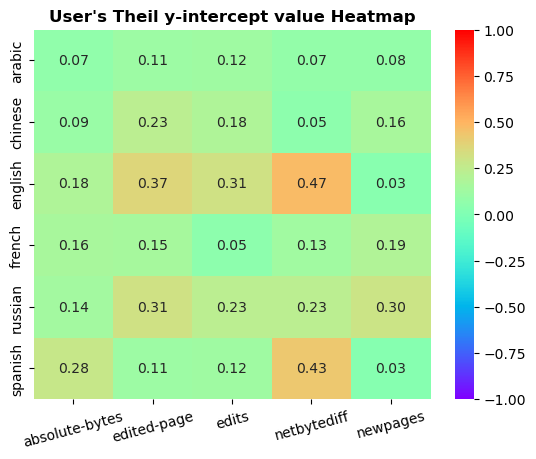

In [260]:
title = "User's Theil y-intercept value Heatmap"
plot("theil-intercept-user", title, "rainbow")